In [3]:
# Main file
# Use case: Pilot test, "integration test"

# === STEP 0: Imports
print("# === STEP 0: Imports: Starting ...")
from modules.dataset_generator.helpers.configuration_loader import ConfigurationLoader as DSConfigLoader
from modules.dataset_generator.factories.data_io_factory import DataIOFactory
from modules.dataset_generator.factories.feature_processor_factory import FeatureProcessorFactory
from modules.dataset_generator.factories.join_factory import JoinFactory
from modules.dataset_generator.factories.strategy_factory import StrategyFactory
from modules.dataset_generator.dataset_generator import DatasetGenerator
from modules.processor.helpers.configuration_loader import ConfigurationLoader as PConfigLoader
from modules.processor.factories.split_strategy_factory import SplitStrategyFactory
from modules.processor.processor import Processor
from modules.model_manager.trainer.trainer import Trainer
from modules.model_manager.predictor.predictor import Predictor
from modules.model_manager.factories.model_factory import ModelFactory
from modules.model_manager.helpers.configuration_loader import ConfigurationLoader as MMConfigLoader
from modules.model_manager.model_manager import ModelManager
print("# === STEP 0: Imports: Complete")

# === STEP 0: Imports: Starting ...
# === STEP 0: Imports: Complete


In [4]:
# === STEP 1: Dependency Instantiations And Global Variable Declarations
print("# === STEP 1: Dependency Instantiations And Global Variable Declarations: Starting ...")
## === DATASET GEN
yaml_path = '/Users/joaquinuriarte/Documents/GitHub/sports-betting/configs/model_v0.yaml'
ds_configuration_loader = DSConfigLoader()
data_factory, feature_processor_factory, join_factory, strategy_factory = DataIOFactory(), FeatureProcessorFactory(), JoinFactory(), StrategyFactory()
## === PROCESSOR
p_configuration_loader = PConfigLoader()
split_strategy_factory = SplitStrategyFactory()
## === MODEL MANAGER
checkpoint = '/Users/joaquinuriarte/Documents/GitHub/sports-betting/models'
trainer = Trainer(checkpoint)
predictor = Predictor()
model_factory = ModelFactory()
mm_configuration_loader = MMConfigLoader()
print("# === STEP 1: Dependency Instantiations And Global Variable Declarations: Complete")

# === STEP 1: Dependency Instantiations And Global Variable Declarations: Starting ...
# === STEP 1: Dependency Instantiations And Global Variable Declarations: Complete


In [5]:
# === STEP 2: DATASET GEN
print("# === STEP 2: DATASET GEN: Starting ...")
dataset_generator = DatasetGenerator(yaml_path, ds_configuration_loader, data_factory, feature_processor_factory, join_factory, strategy_factory)

# === STEP 2: DATASET GEN: Starting ...


In [6]:
processed_dataset = dataset_generator.generate()
print("# === STEP 2: DATASET GEN: Complete")

/Users/joaquinuriarte/Documents/GitHub/sports-betting/modules/dataset_generator/helpers/dataset_loader.py:58: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[column_name] = pd.to_datetime(


Failed to cast 99 rows in column PTS_home of /Users/joaquinuriarte/Desktop/dataset/games.csv. Dropping these rows.
Invalid data: 19175   NaN
19176   NaN
19177   NaN
19178   NaN
19179   NaN
         ..
19269   NaN
19270   NaN
19271   NaN
19278   NaN
19279   NaN
Name: PTS_home, Length: 99, dtype: float64


/Users/joaquinuriarte/Documents/GitHub/sports-betting/modules/dataset_generator/helpers/dataset_loader.py:66: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column_name] = pd.to_numeric(


Invalid format in column MIN in /Users/joaquinuriarte/Desktop/dataset/games_details.csv. Dropping 134549 rows.
Invalid data: 13        nan
51        nan
62        nan
63        nan
64        nan
         ... 
668623     19
668624     23
668625     15
668626     19
668627     27
Name: MIN, Length: 134549, dtype: object


/Users/joaquinuriarte/Documents/GitHub/sports-betting/modules/dataset_generator/helpers/dataset_loader.py:66: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column_name] = pd.to_numeric(
INFO:root:Skipping game 20300001 due to insufficient player data.
INFO:root:Skipping game 20300002 due to insufficient player data.
INFO:root:Skipping game 20300003 due to insufficient player data.
INFO:root:Skipping game 20300004 due to insufficient player data.
INFO:root:Skipping game 20300005 due to insufficient player data.
INFO:root:Skipping game 20300006 due to insufficient player data.
INFO:root:Skipping game 20300007 due to insufficient player data.
INFO:root:Skipping game 20300008 due to insufficient player data.
INFO:root:Skipping game 20300009 due to

# === STEP 2: DATASET GEN: Complete


In [10]:
processed_dataset.features

,A_player_1_MIN,A_player_1_PTS,A_player_1_AST,A_player_1_TO,A_player_1_PLUS_MINUS,A_player_1_OREB,A_player_1_DREB,A_player_1_PF,A_player_1_FG3_PCT,A_player_1_FG_PCT,...,B_player_8_AST,B_player_8_TO,B_player_8_PLUS_MINUS,B_player_8_OREB,B_player_8_DREB,B_player_8_PF,B_player_8_FG3_PCT,B_player_8_FG_PCT,B_player_8_FT_PCT,Team_A_Wins
GAME_ID,,,,,,,,,,,,,,,,,,,,,
11400001,41.266667,31.0,5.0,1.0,-16.0,1.0,9.0,1.0,0.333,0.476,...,0.0,0.0,-11.0,0.0,0.0,4.0,0.0000,0.6670,0.0,0
11400002,45.083333,18.0,6.0,2.0,2.0,0.0,2.0,2.0,0.500,0.417,...,4.0,2.0,5.0,0.0,0.0,2.0,0.0000,0.4000,0.0,1
11400004,43.200000,6.0,7.0,4.0,-1.0,2.0,16.0,1.0,0.000,0.375,...,0.0,0.0,2.0,0.0,0.0,1.0,0.0000,0.0000,0.0,0
11400005,36.600000,12.0,2.0,1.0,9.0,1.0,7.0,3.0,0.000,0.545,...,1.0,0.0,6.0,0.0,5.0,4.0,0.5000,0.6670,1.0,1
11400006,36.866667,18.0,3.0,5.0,-17.0,2.0,3.0,4.0,0.429,0.389,...,0.0,0.0,13.0,0.0,3.0,4.0,0.0000,0.6000,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52100111,32.566667,22.0,0.0,2.0,18.0,0.0,2.0,1.0,1.000,0.538,...,0.0,0.0,-4.0,0.0,0.0,0.0,0.0000,0.0000,0.0,1
52100121,21.316667,13.0,2.0,0.0,-3.0,3.0,0.0,4.0,0.000,0.714,...,2.5,0.5,14.5,0.0,3.0,2.0,0.4165,0.4285,0.5,1
52100131,32.316667,19.0,6.0,3.0,-13.0,3.0,2.0,2.0,0.000,0.533,...,1.0,0.0,-1.0,2.0,2.0,0.0,0.0000,0.5000,1.0,1


In [11]:
# === STEP 3: PROCESSOR
print("# === STEP 3: PROCESSOR: Starting ...")
processor = Processor(yaml_path, p_configuration_loader, processed_dataset, split_strategy_factory)

# === STEP 3: PROCESSOR: Starting ...


In [9]:
train_dataset, validation_dataset = processor.generate(val_dataset_flag=True)
print("# === STEP 3: PROCESSOR: Complete")

# === STEP 3: PROCESSOR: Complete


In [13]:
# === STEP 4: MODEL MANAGER
print("# === STEP 4: MODEL MANAGER: Starting ...")
model_manager = ModelManager(trainer, predictor, model_factory, mm_configuration_loader)

# === STEP 4: MODEL MANAGER: Starting ...


In [ ]:
train_dataset.examples[0].features

In [14]:
len(train_dataset.examples[0].features) # should be 177

177

In [22]:
models = model_manager.create_models([yaml_path])

In [25]:
g = models_and_config[0][0].get_training_config()
g.training.get("epochs")

20

INFO:root:Training model '8997782287ac95361ce10ecee1af1840' for 20 epochs with batch size 32.
INFO:root:Model '8997782287ac95361ce10ecee1af1840': Starting epoch 1/20.


557/557 [==============================] - 1s 1ms/step - loss: 0.7749 - accuracy: 0.5183


INFO:root:Epoch 1/20 - Training Accuracy: 0.4138, Validation Accuracy: 0.4032


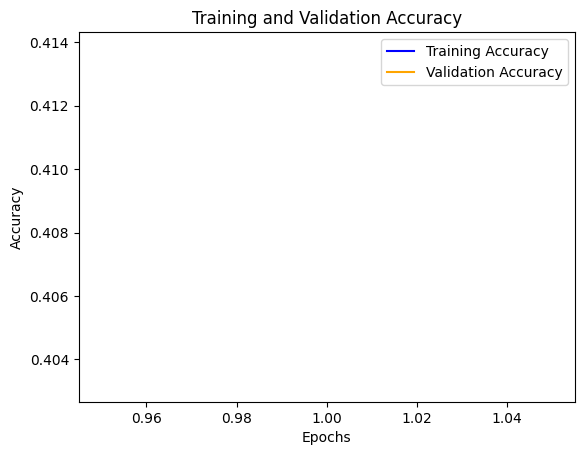

INFO:root:Model '8997782287ac95361ce10ecee1af1840': Starting epoch 2/20.


557/557 [==============================] - 1s 1ms/step - loss: 0.6824 - accuracy: 0.5246


INFO:root:Epoch 2/20 - Training Accuracy: 0.4138, Validation Accuracy: 0.4032
INFO:root:Model '8997782287ac95361ce10ecee1af1840': Starting epoch 3/20.


557/557 [==============================] - 1s 2ms/step - loss: 0.6745 - accuracy: 0.5284


INFO:root:Epoch 3/20 - Training Accuracy: 0.4138, Validation Accuracy: 0.4032
INFO:root:Model '8997782287ac95361ce10ecee1af1840': Starting epoch 4/20.


557/557 [==============================] - 1s 1ms/step - loss: 0.6729 - accuracy: 0.5293


INFO:root:Epoch 4/20 - Training Accuracy: 0.4138, Validation Accuracy: 0.4032
INFO:root:Model '8997782287ac95361ce10ecee1af1840': Starting epoch 5/20.


557/557 [==============================] - 1s 1ms/step - loss: 0.6689 - accuracy: 0.5302


INFO:root:Epoch 5/20 - Training Accuracy: 0.4138, Validation Accuracy: 0.4032
INFO:root:Model '8997782287ac95361ce10ecee1af1840': Starting epoch 6/20.


557/557 [==============================] - 1s 1ms/step - loss: 0.6666 - accuracy: 0.5383


INFO:root:Epoch 6/20 - Training Accuracy: 0.4138, Validation Accuracy: 0.4032
INFO:root:Model '8997782287ac95361ce10ecee1af1840': Starting epoch 7/20.


557/557 [==============================] - 1s 1ms/step - loss: 0.6656 - accuracy: 0.5338


INFO:root:Epoch 7/20 - Training Accuracy: 0.4138, Validation Accuracy: 0.4032
INFO:root:Model '8997782287ac95361ce10ecee1af1840': Starting epoch 8/20.


557/557 [==============================] - 1s 1ms/step - loss: 0.6631 - accuracy: 0.5337


INFO:root:Epoch 8/20 - Training Accuracy: 0.4138, Validation Accuracy: 0.4032
INFO:root:Model '8997782287ac95361ce10ecee1af1840': Starting epoch 9/20.


557/557 [==============================] - 1s 1ms/step - loss: 0.6629 - accuracy: 0.5398


INFO:root:Epoch 9/20 - Training Accuracy: 0.4138, Validation Accuracy: 0.4032
INFO:root:Model '8997782287ac95361ce10ecee1af1840': Starting epoch 10/20.


557/557 [==============================] - 1s 1ms/step - loss: 0.6602 - accuracy: 0.5435


INFO:root:Epoch 10/20 - Training Accuracy: 0.4138, Validation Accuracy: 0.4032
INFO:root:Model '8997782287ac95361ce10ecee1af1840': Starting epoch 11/20.


557/557 [==============================] - 1s 1ms/step - loss: 0.6578 - accuracy: 0.5449


INFO:root:Epoch 11/20 - Training Accuracy: 0.4138, Validation Accuracy: 0.4032
INFO:root:Model '8997782287ac95361ce10ecee1af1840': Starting epoch 12/20.


557/557 [==============================] - 1s 1ms/step - loss: 0.6536 - accuracy: 0.5579


INFO:root:Epoch 12/20 - Training Accuracy: 0.4138, Validation Accuracy: 0.4032
INFO:root:Model '8997782287ac95361ce10ecee1af1840': Starting epoch 13/20.


557/557 [==============================] - 1s 1ms/step - loss: 0.6509 - accuracy: 0.5580


INFO:root:Epoch 13/20 - Training Accuracy: 0.4138, Validation Accuracy: 0.4032
INFO:root:Model '8997782287ac95361ce10ecee1af1840': Starting epoch 14/20.


557/557 [==============================] - 1s 1ms/step - loss: 0.6454 - accuracy: 0.5680


INFO:root:Epoch 14/20 - Training Accuracy: 0.4138, Validation Accuracy: 0.4032
INFO:root:Model '8997782287ac95361ce10ecee1af1840': Starting epoch 15/20.


557/557 [==============================] - 1s 1ms/step - loss: 0.6406 - accuracy: 0.5745


INFO:root:Epoch 15/20 - Training Accuracy: 0.4138, Validation Accuracy: 0.4032
INFO:root:Model '8997782287ac95361ce10ecee1af1840': Starting epoch 16/20.


557/557 [==============================] - 1s 1ms/step - loss: 0.6358 - accuracy: 0.5861


INFO:root:Epoch 16/20 - Training Accuracy: 0.4138, Validation Accuracy: 0.4032
INFO:root:Model '8997782287ac95361ce10ecee1af1840': Starting epoch 17/20.


557/557 [==============================] - 1s 1ms/step - loss: 0.6313 - accuracy: 0.5942


INFO:root:Epoch 17/20 - Training Accuracy: 0.4138, Validation Accuracy: 0.4032
INFO:root:Model '8997782287ac95361ce10ecee1af1840': Starting epoch 18/20.


557/557 [==============================] - 1s 2ms/step - loss: 0.6269 - accuracy: 0.5973


INFO:root:Epoch 18/20 - Training Accuracy: 0.4138, Validation Accuracy: 0.4032
INFO:root:Model '8997782287ac95361ce10ecee1af1840': Starting epoch 19/20.


557/557 [==============================] - 1s 1ms/step - loss: 0.6191 - accuracy: 0.6067


INFO:root:Epoch 19/20 - Training Accuracy: 0.4138, Validation Accuracy: 0.4032
INFO:root:Model '8997782287ac95361ce10ecee1af1840': Starting epoch 20/20.


557/557 [==============================] - 1s 1ms/step - loss: 0.6115 - accuracy: 0.6195


INFO:root:Epoch 20/20 - Training Accuracy: 0.4138, Validation Accuracy: 0.4032


<Figure size 640x480 with 0 Axes>

Model saved successfully at: models/8997782287ac95361ce10ecee1af1840/model_weights_8997782287ac95361ce10ecee1af1840.pth
# === STEP 4: MODEL MANAGER: Complete


In [12]:
for item in models_and_config:
    model_manager.train([item[0]], [(train_dataset, validation_dataset)], save_after_training=True)
print("# === STEP 4: MODEL MANAGER: Complete")